# Water Potability Prediction using Logistic Regression
by Aniket Guchhait

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

# Data Loading

In [3]:
data = pd.read_csv("water_potability.csv") # loading data from csv file
clean_data = data.dropna() # droping all NaN values
clean_data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


# Data Distribution

C:\Users\anike\AppData\Local\Temp\ipykernel_23320\3673077700.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(clean_data['Sulfate'])


<AxesSubplot:xlabel='Sulfate', ylabel='Density'>

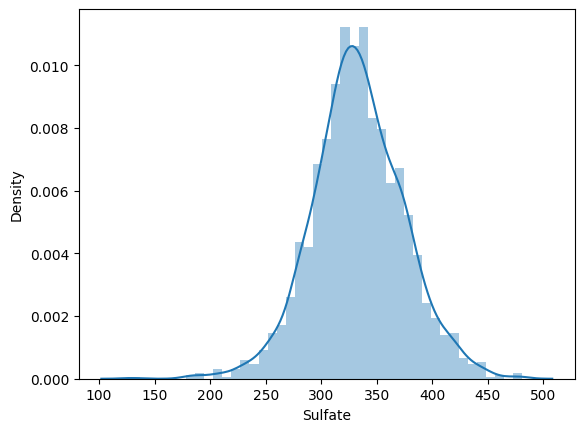

In [4]:
sns.distplot(clean_data['Sulfate'])


# Data Visualization

In [5]:
import matplotlib.pyplot as plt


Data Splitting

In [6]:
x = clean_data.drop(['Potability'],axis="columns") # splitting features 
y = clean_data.Potability # splitting target


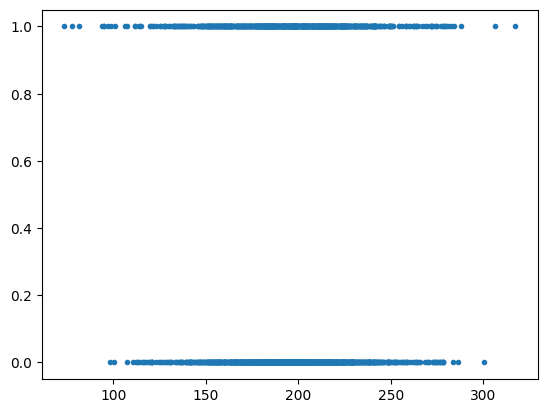

In [7]:
plt.scatter(x['Hardness'],y,marker=".")

# Training, Testing and Splitting 

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1) # splitting training and testing data

# Importing Logistic Regression Model

In [10]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver='lbfgs')  # making linear regression model

In [11]:
lr_model.fit(x_train,y_train) # fitting data to model

LogisticRegression()

In [12]:
lr_model.score(x_test,y_test) # testing model accuracy

0.6352357320099256

# Plotting the Model

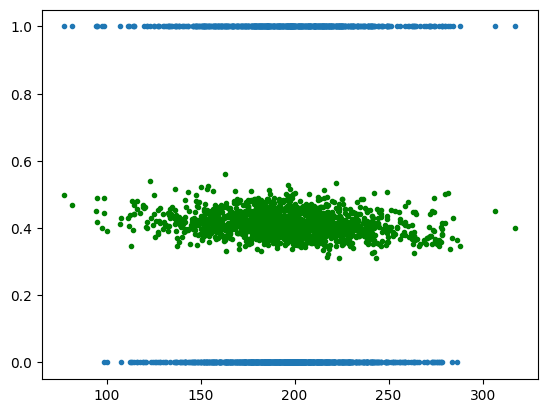

In [13]:
from turtle import color
import matplotlib.pyplot as plt
plt.scatter(x_train['Hardness'],y_train,marker=".")
plt.scatter(x_train['Hardness'],lr_model.predict_proba(x_train)[:,1],color="green",marker=".") #plotting the model over the real data

# Plotting Confusion Matrix

In [14]:
from sklearn.metrics import confusion_matrix
y_pred = lr_model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[250,   3],
       [144,   6]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

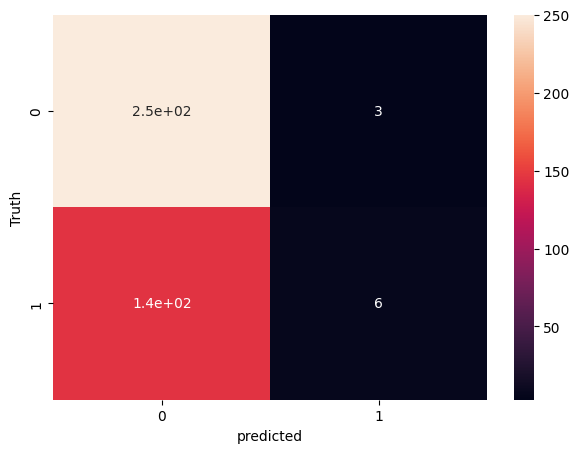

In [15]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)   # using seaborn plotting confusion matrix
plt.xlabel('predicted')
plt.ylabel('Truth')

# Classification Report

In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.99      0.77       253
           1       0.67      0.04      0.08       150

    accuracy                           0.64       403
   macro avg       0.65      0.51      0.42       403
weighted avg       0.65      0.64      0.51       403

